<a href="https://colab.research.google.com/github/sarveshssk/Line-Follower-Robot/blob/main/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Model

In [ ]:

cnn = tf.keras.models.load_model('/content/drive/MyDrive/snacks/snacks_model.h5')

Visualising and Performing Prediction on Single image

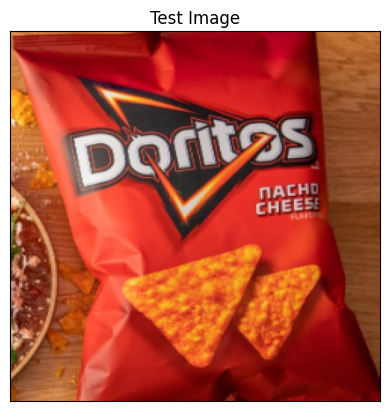

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/snacks/snacks/test/Doritos Cheese Flavour/Screenshot-2024-06-25-130647_png_jpg.rf.ea362b9832179696ede6cad7054d124a.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64)) #use same format that used for training
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [ ]:
print(predictions)

[[6.6052051e-03 3.2026124e-01 0.0000000e+00 8.8552270e-07 0.0000000e+00
  6.4246866e-26 6.7313272e-01]]


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/snacks/snacks/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)#xxxx

Found 73 files belonging to 7 classes.


In [ ]:
test_set.class_names

['Doritos Cheese Flavour',
 'Doritos Flaming Hot',
 'Doritos Sweet Chilli Flavour',
 'Lays Classic Salted',
 'Lays Magic Masala',
 'Lays Spanish Tomato Tango',
 'Nestle Maggie']

In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


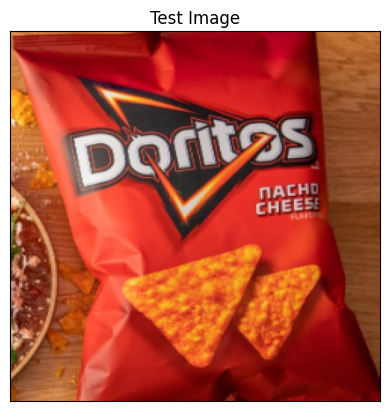

In [ ]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a Doritos Cheese Flavour
